# Overview

From: **[Kaggle SMS Spam Collection Dataset](https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset/data)**

**Context**

The SMS Spam Collection is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged acording being ham (legitimate) or spam.

**Content**

The files contain one message per line. Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.

**Notes**

This project stems (ha!) from practicing text normalization and practicing with various normalization techniques (i.e., lemmatization, stemming, case folding, and embeddings).

## Approach
- Read Data
- Explore the Data
- Processing the messages
- Classification

In [170]:
# Import Libraries
import pandas as pd
import numpy as np
import nltk

In [233]:
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re

## 1) Read Data

In [234]:
sms = pd.read_csv('desktop/spam.csv', encoding='latin-1')
sms = sms.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1)
sms.columns = ['label', 'msg']

In [235]:
# One-Hot-Encoding for ham/spam
sms = sms.replace(['ham', 'spam'],[0,1])

In [236]:
sms.head()

,label,msg
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [237]:
print(sms['msg'][0])
print(sms['msg'][1])
print(sms['msg'][2])

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
Ok lar... Joking wif u oni...
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


## 2) Explore the Data

In [238]:
#sms.describe()
print(f"no. of rows: {len(sms)}")

no. of rows: 5572


In [239]:
# Total spam(1) and ham(0) messages
sms.label.value_counts()

label
0    4825
1     747
Name: count, dtype: int64

In [240]:
# Count the number of characters in each message
sms['Count'] = sms['msg'].apply(len)
sms.head()

,label,msg,Count
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


### **2.1 Exploratory Data Analysis**

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: ylabel='Frequency'>

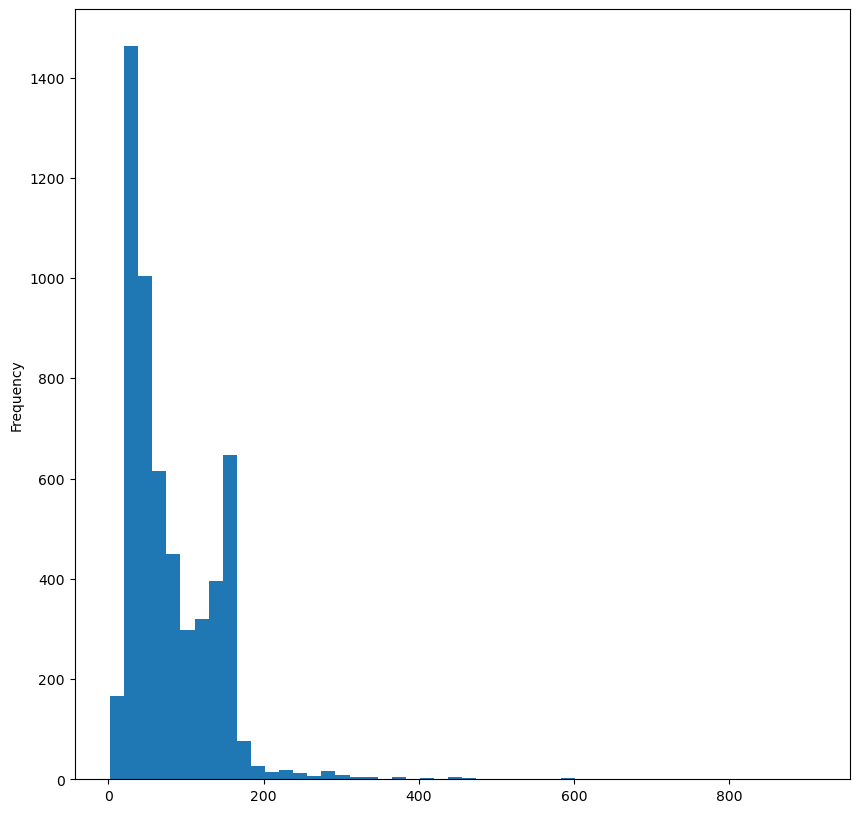

In [242]:
sms['Count'].plot(bins=50, kind='hist',figsize=(10,10))

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

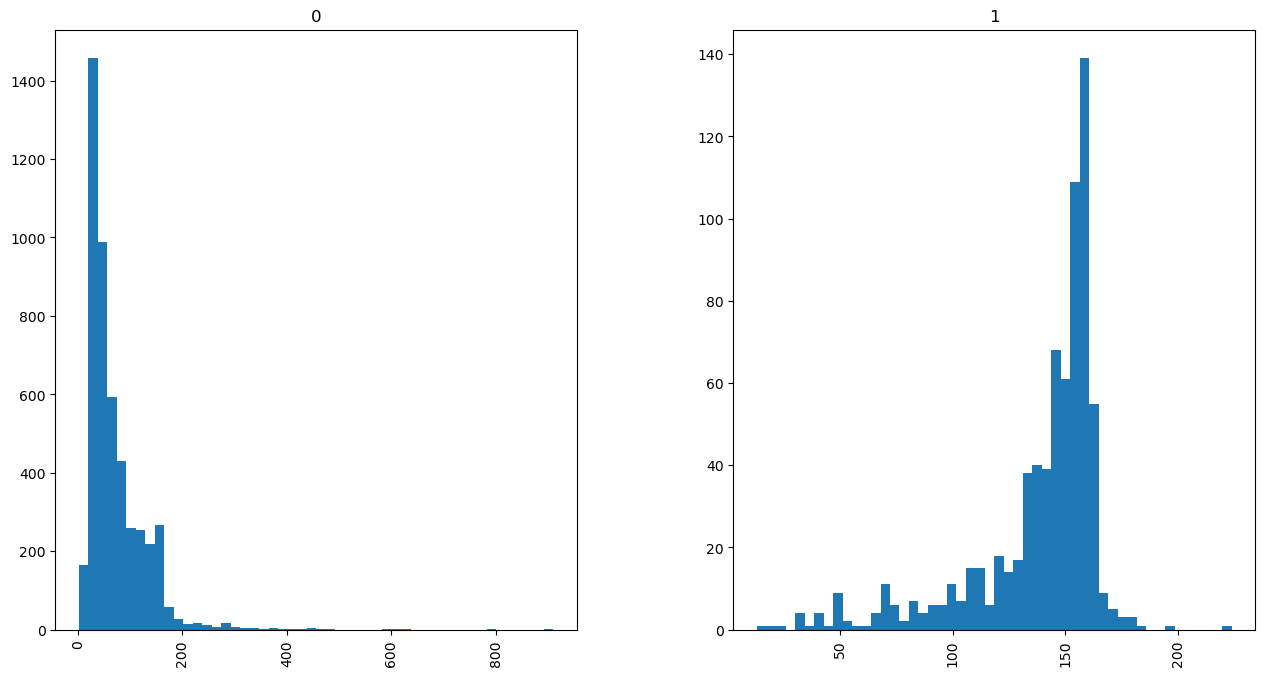

In [243]:
sms.hist(column='Count', by='label', bins=50, figsize=(15,8))

# 3) Processing Messages
- PorterStemmer, Regular Expressions
- Bag of Words

In [244]:
corpus = []
ps = PorterStemmer()

In [245]:
sms['msg'][1]

'Ok lar... Joking wif u oni...'

In [246]:
clean = sms['msg'][1]
clean

'Ok lar... Joking wif u oni...'

In [247]:
# Implement Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

In [204]:
# First method using ONLY bag of words
count=CountVectorizer()
msg = count.fit_transform(sms['msg']).toarray()

In [248]:
# Second method using regular expressions/ porter stemmer
for i in range(0, 5572):
    
    # Applying common REs to handle specific cases
    """
    Replace email address with 'email'
    Replace URLS with 'http'
    Replace currency symbols with 'moneysymb'
    Replace phone numbers with 'phonenumb'
    Replace numbers with 'numb'
    """
    cleaned_msg = sms['msg'][i]
    cleaned_msg = re.sub('\b[\w\-.]+?@\w+?\.\w{2,4}\b', 'email', sms['msg'][i])
    cleaned_msg = re.sub('(http[s]?\S+)|(\w+\.[A-Za-z]{2,4}\S*)', 'https', sms['msg'][i])
    cleaned_msg = re.sub('£|\$', 'moneysymb', sms['msg'][i])
    cleaned_msg = re.sub('\b(?:\+?(\d{1,3})\s?)?[\-(.]?\d{3}[\s.-]?\d{3}[\s.-]?\d{4}\b', 'phonenumb', sms['msg'][i])
    cleaned_msg = re.sub('\d+(\.\d+)?','numb', sms['msg'][i])
    
    # Remove punctuation for normalization
    cleaned_msg = re.sub('[^\w\d\s]', ' ', sms['msg'][i])
    
    # Begin printing example 1
    if i<2:
        print("\t\t\t\t Message ", i)
    
    if i<2:
        print(f"\n After Regular Expression {i} : {cleaned_msg}")
    
    # Case folding 
    cleaned_msg = cleaned_msg.lower()
    if i<2:
        print(f"\n After case folding {i} : {cleaned_msg}")
    
    # Splitting words to tokenize
    tokenized_msg = cleaned_msg.split()
    if i<2:
        print(f"\n After splitting {i} : {tokenized_msg}")
        
    # PorterStemmer avoiding Stopwords
    stemmed_msg = [ps.stem(word) for word in tokenized_msg if word not in set(stopwords.words('english'))]
    if i<2:
        print(f"\n After stemming {i} : {stemmed_msg}")

    # Preparing Messages with Remaining Tokens
    final_msg = ' '.join(stemmed_msg)
    if i<2:
        print(f"\n Final Prepared - Message {i} : {final_msg}, \n\n")
        
    # Prepare WordVector Corpus
    
    corpus.append(final_msg)    

				 Message  0

 After Regular Expression 0 : Go until jurong point  crazy   Available only in bugis n great world la e buffet    Cine there got amore wat   

 After case folding 0 : go until jurong point  crazy   available only in bugis n great world la e buffet    cine there got amore wat   

 After splitting 0 : ['go', 'until', 'jurong', 'point', 'crazy', 'available', 'only', 'in', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'there', 'got', 'amore', 'wat']

 After stemming 0 : ['go', 'jurong', 'point', 'crazi', 'avail', 'bugi', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amor', 'wat']

 Final Prepared - Message 0 : go jurong point crazi avail bugi n great world la e buffet cine got amor wat, 


				 Message  1

 After Regular Expression 1 : Ok lar    Joking wif u oni   

 After case folding 1 : ok lar    joking wif u oni   

 After splitting 1 : ['ok', 'lar', 'joking', 'wif', 'u', 'oni']

 After stemming 1 : ['ok', 'lar', 'joke', 'wif', 'u', 'oni']


In [249]:
# already implemented: see above  
count = CountVectorizer()
msg = count.fit_transform(corpus).toarray() 

# 4) Apply Classification
- Naïve Bayes
- Gaussian Naïve Bayes
- Decision Trees

**Input**: Prepared a Sparse Matrix

**Ouput**: Labels (Ham or Spam)

In [250]:
y = sms['label']
# done earlier in the process; same results but beginning to encode labels
print(y.value_counts())

label
0    4825
1     747
Name: count, dtype: int64


**Encoding Labels**

In [251]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

**Split the train-test data**

In [252]:
from sklearn.model_selection import train_test_split

In [253]:
print(X_train.shape)
print(X_test.shape)

(4457, 8672)
(1115, 8672)


In [254]:
X_train, X_test, y_train, y_test = train_test_split(msg, y, test_size=0.2, random_state=1)

In [255]:
X_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

**Classifier time!**

### 4.1 Naïve Bayes

In [256]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [257]:
prediction=model.predict(X_test)

In [258]:
print(prediction)

[0 0 0 ... 0 0 0]


In [259]:
# Evaluating
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)

In [260]:
cm

array([[966,  10],
       [  6, 133]])

In [261]:
from sklearn.metrics import classification_report
print("Accuarcy : %0.5f \n\n"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Accuarcy : 0.98565 


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       976
           1       0.93      0.96      0.94       139

    accuracy                           0.99      1115
   macro avg       0.96      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [262]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print("Accuracy Score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision Score: {}". format(precision_score(y_test, prediction)) )
print("Recall Score: {}". format(recall_score(y_test, prediction)) )
print("F1 Score: {}". format(f1_score(y_test, prediction)) )

Accuracy Score: 0.9856502242152466
Precision Score: 0.9300699300699301
Recall Score: 0.9568345323741008
F1 Score: 0.9432624113475178


### 4.2 Gaussian NB

In [263]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [264]:
prediction=model.predict(X_test)

In [265]:
# Evaluating
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)

In [266]:
cm

array([[848, 128],
       [  9, 130]])

In [267]:
print("Accuarcy : %0.5f \n\n"% accuracy_score(y_test, model.predict(X_test)))
print(classification_report(y_test, model.predict(X_test)))

Accuarcy : 0.87713 


              precision    recall  f1-score   support

           0       0.99      0.87      0.93       976
           1       0.50      0.94      0.65       139

    accuracy                           0.88      1115
   macro avg       0.75      0.90      0.79      1115
weighted avg       0.93      0.88      0.89      1115



In [268]:
print("Accuracy Score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision Score: {}". format(precision_score(y_test, prediction)) )
print("Recall Score: {}". format(recall_score(y_test, prediction)) )
print("F1 Score: {}". format(f1_score(y_test, prediction)) )

Accuracy Score: 0.8771300448430494
Precision Score: 0.5038759689922481
Recall Score: 0.935251798561151
F1 Score: 0.654911838790932


### 4.3 Decision Tree

In [269]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=50)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=50)

In [270]:
# Predicting
prediction = dt.predict(X_test)

In [271]:
cm = confusion_matrix(y_test, prediction)

In [272]:
cm

array([[964,  12],
       [  9, 130]])

In [273]:
print("Accuarcy : %0.5f \n\n"% accuracy_score(y_test, dt.predict(X_test)))
print(classification_report(y_test, dt.predict(X_test)))

Accuarcy : 0.98117 


              precision    recall  f1-score   support

           0       0.99      0.99      0.99       976
           1       0.92      0.94      0.93       139

    accuracy                           0.98      1115
   macro avg       0.95      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [274]:
print("Accuracy Score: {}". format(accuracy_score(y_test, prediction)) )
print("Precision Score: {}". format(precision_score(y_test, prediction)) )
print("Recall Score: {}". format(recall_score(y_test, prediction)) )
print("F1 Score: {}". format(f1_score(y_test, prediction)) )

Accuracy Score: 0.9811659192825112
Precision Score: 0.9154929577464789
Recall Score: 0.935251798561151
F1 Score: 0.9252669039145907


# 5) Final Accuracy
(Using Method 2; method 1 is trivially worse)
- **Decision Tree  : 98.117%**
- **Guassian NB    : 87.133%**  
- **Multinomial NB : 98.565%**

### Notes:
Multinomial NB works better for features that represent counts or frequencies, often used in text classification. Bernoulli NB is suitable for binary/boolean features. If both models are performing similarly, it's worth exploring further by analyzing the misclassifications.

### Consider using lemmatization instead of stemming!